In [22]:
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt
from scipy.fft import fft, fftshift, fftfreq

In [23]:
def meander(time: npt.NDArray, duty: float, period: float) -> npt.NDArray:
    """Функция генерации последовательности видеоимпульсов."""
    s = np.zeros_like(time)
    newtime = (
        np.arcsin(np.sin(2.0 * np.pi / period * time + np.pi / 2)) /
        np.pi + 0.5)
    s[newtime < duty] = 1
    return s

## Исходные данные

In [24]:
dt = 20e-12
signal_len = 8 * 1024
duty = 0.25
period = 4e-9

## Последовательность видеоимпульсов

In [25]:
time = np.arange(signal_len) * dt
signal = meander(time, duty, period)

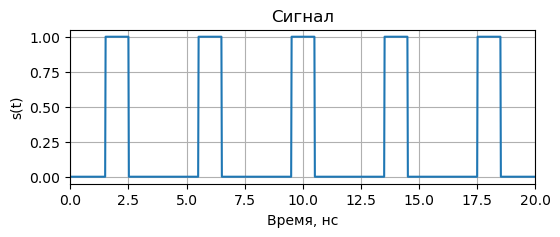

In [26]:
fig = plt.figure(figsize=(6, 2))
ax_signal = fig.add_subplot()
ax_signal.plot(time / 1e-9, signal)
ax_signal.set_title("Сигнал")
ax_signal.set_xlabel("Время, нс")
ax_signal.set_ylabel("s(t)")
ax_signal.set_xlim(0, 20)
ax_signal.grid()

## Спектр последовательности видеоимпульсов

$$
\Large \dot {S} \left (k \right ) = \sum_{n = 0}^{N − 1} {\dot {s}} \left (n \right ) {e} ^ {− i {{2 \pi} \over {N}} n k} , k = 0 , 1 , … , N − 1
$$

In [27]:
from IPython.display import display, Math
display(Math(r'''\Large \dot {s} \left (n \right ) = 
{1 \over N} \sum_{k = 0}^{N − 1} {\dot {S}} \left (k \right )
{e} ^ {i {{2 \pi} \over {N}} n k}, 
n = 0 , 1 , … , N − 1'''))

<IPython.core.display.Math object>

In [28]:
freq_min_GHz = -7
freq_max_GHz = 7
spectrum = fftshift(fft(signal))
spectrum_mag = np.abs(spectrum)
spectrum_phase = np.unwrap(np.angle(spectrum))
freq = fftshift(fftfreq(signal_len, dt))
freq

array([-2.50000000e+10, -2.49938965e+10, -2.49877930e+10, ...,
        2.49816895e+10,  2.49877930e+10,  2.49938965e+10], shape=(8192,))

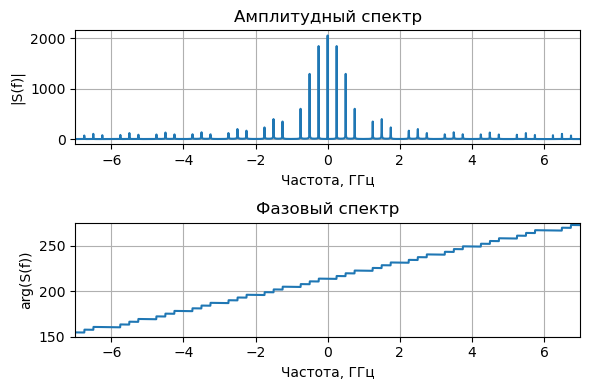

In [29]:
fig = plt.figure(figsize=(6, 4))
ax_spectrum_mag = fig.add_subplot(2, 1, 1)
ax_spectrum_mag.plot(freq / 1e9, spectrum_mag)
ax_spectrum_mag.set_title("Амплитудный спектр")
ax_spectrum_mag.set_xlabel("Частота, ГГц")
ax_spectrum_mag.set_ylabel("|S(f)|")
ax_spectrum_mag.set_xlim(freq_min_GHz, freq_max_GHz)
ax_spectrum_mag.grid()

ax_spectrum_phase = fig.add_subplot(2, 1, 2)
ax_spectrum_phase.plot(freq / 1e9, spectrum_phase)
ax_spectrum_phase.set_title("Фазовый спектр")
ax_spectrum_phase.set_xlabel("Частота, ГГц")
ax_spectrum_phase.set_ylabel("arg(S(f))")
ax_spectrum_phase.set_xlim(freq_min_GHz, freq_max_GHz)
ax_spectrum_phase.set_ylim(150, 275)
ax_spectrum_phase.grid()

fig.tight_layout()